# Большое Домашнее Задание №1 : Кластеризация

В данном домашнем задании мы пощнакомимся поближе с кластеризацией.

Кластеризация — это метод машинного обучения, который включает группировку данных в пространстве признаков. Теоретически, точки, находящиеся в одной группе, должны иметь схожие свойства, в то время как точки в разных группах должны иметь сильно отличающиеся свойства.

Кластеризация является методом обучения без учителя и распространенным методом статистического анализа данных, используемым во многих областях. В частности используется при составлении портретов пользователей, поиске аномалий. В анализе данных часто прибегают к кластеризации, чтобы получить ценную информацию из наших данных, наблюдая, в какие группы попадают точки.

## Оценивание

За это задание вы получите целых 3 разные оценки <font color="red"> констатирующую </font>, <font color="blue"> формирующую </font> и <font color="green"> творческую </font>.
Оценка вычисляется как сумма баллов по заданию каждого типа. Тип задания можно определить по цвету надписи.

## Пишем K-means

В данном задании от вас потребуется реализовать алгоритм K-means самостоятельно. K-means принимает на вход вектора и присваивает им номер кластера. Напомним общий принцип работы алгоритма.

Для данного набора данных задается k - количество отдельных групп, к которым принадлежат точки. Эти k центроидов сначала инициализируются случайным образом, а затем выполняются итерации для оптимизации расположения этих k центроидов следующим образом:

1. Вычисляется расстояние от каждой точки до каждого центроида.
2. Точки приписываются к ближайшему центроиду.
3. Центроиды сдвигаются так, чтобы их среднее значение было равно среднему значению принадлежащих им точек. Если центроиды не сдвинулись, алгоритм завершается, в противном случае повторяется.



### Данные

Чтобы оценить наш алгоритм, мы сначала сгенерируем набор данных - группы в двумерном пространстве.
Функция sklearn.datasets [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) создает группы двумерных нормальных распределений и присваивает метку, соответствующую группе, к которой принадлежит точка.

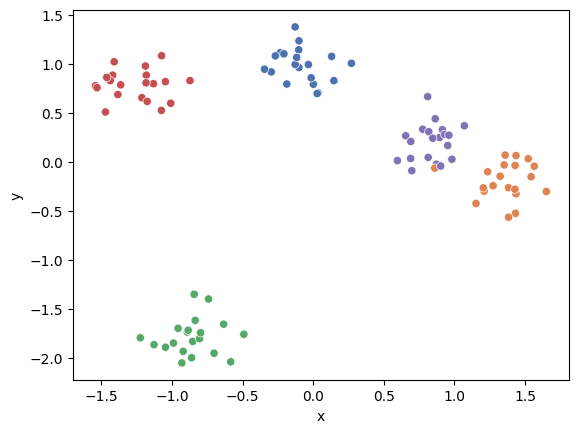

In [ ]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
centers = 5 # количество групп
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### А теперь пишем код

#### Вспомогательные функции

<font color="blue">**Задание** (0.5 баллов)</font> В этом алгоритме нам нужно будет многократно вычислять расстояния между точкой и набором точек. Для этого определим функцию, которая вычисляет евклидовы расстояния.

In [ ]:
import numpy as np

def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    # Все вычисления должны быть выполенны с помощью numpy без использования циклов
    result = np.sqrt(np.sum((data - point)**2, axis=1))
    return result

#### Алгоритм K-means

<font color="red">**Задание** (2 баллa)</font> Допишите код

In [ ]:
from numpy.random import uniform

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters # Количество кластеров
        self.max_iter = max_iter # Максимальное количество итераций
    def fit(self, X_train):
        """
        X_train: numpy array of shape (n,m)
        """
        # Случайно выбираем начальные точки центроида, равномерно распределенные по области набора данных

        # Найдите минимальное и максимальное значение для каждого измерения в X_train (координаты по широте и долготе) и сохраните их в min_ и max_
        min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]

        # Итеративно повторяем до сходимости или до максимального количества итераций
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:

            # Сортируем точки по ближайшему центроиду
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                #Найдите индекс ближайшего центроида см. функцию np.argmin
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Сохраните текущие центроиды в prev_centroids
            prev_centroids = np.copy(self.centroids)
            # Обновите центроиды средним значением точек в кластере
            self.centroids = [np.mean(points, axis=0) if points else prev for points, prev in zip(sorted_points, prev_centroids)]

            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Если центроид не имеет ни одной точки, то выбираем предыдущее значение
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def evaluate(self, X):
        """
        Function to evaluate the model on the dataset X.
        X: numpy array of shape (n,m)
        """
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

### Оцениваем работу K-means
Запустим несколько раз наш алгоритм на данных которые мы сгенерировали

* Разными цветами обозначены разные группы из генерации
* Разными формами обозначены разные кластеры
* Тонкий синий крестик -  центройд каждого кластера

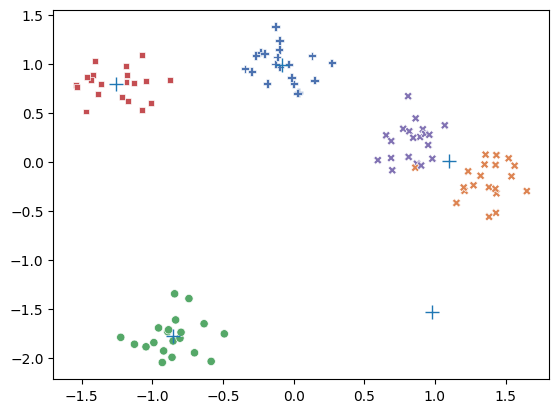

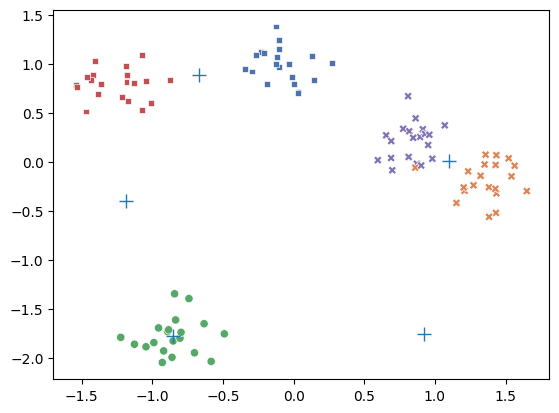

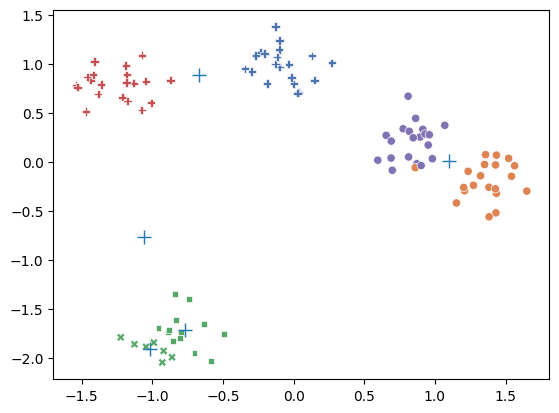

In [ ]:
import warnings
warnings.filterwarnings('ignore')


for i in range(3):
    kmeans = KMeans(n_clusters=centers) # Передадим количество кластеров, которое мы задали в данных
    kmeans.fit(X_train)
    # View results
    class_centers, classification = kmeans.evaluate(X_train)
    sns.scatterplot(x=[X[0] for X in X_train],
                    y=[X[1] for X in X_train],
                    hue=true_labels,
                    style=classification,
                    palette="deep",
                    legend=None
                    )
    plt.plot([x for x, _ in kmeans.centroids],
            [y for _, y in kmeans.centroids],
            '+',
            markersize=10,
            )
    plt.show()

<font color="blue">**Задание** (1.25 балл)</font>

Ответьте на вопросы:
* Почему при каждом новом запуске у нас получались разные разбиения на кластеры?
* Оцените работу вашей реализации. С чем связаны плохие результаты? (это нормально, они и должны быть такими)
* При каких стартовых значениях центройдов алгоритм может работать плохо?

1. K-means инициализирует центроиды случайным образом. Поскольку начальные позиции центроидов влияют на конечное разбиение на кластеры, различные инициализации могут привести к разным результатам. Каждый запуск алгоритма с разными начальными центроидами по-разному разбивает точки на кластеры.
2. Первое, что приходит на ум, это выбросы, к которым K-means очень чувствителен. Также вышеупомянутая рандомная инициализация центроидов может негативно сказываться на поиске индексов ближайших к кластерам центроидов.
3. Алгоритм будет работать плоховато если расставленные центроиды окажутся слишком близко друг к другу ибо их конкуренция за ближайший кластер может привести к искажению конечных данных. Также расположение центроидов вблизи выбросов(особенно если имеется группа выбросов) не особо хорошая идея, так как центроид может быть притянут к этим самым выбросам и опять же искажать итоговую картину.

### Работа над ошибками

<font color="red">**Задание** (1.5 балл)</font>

Поменяйте строчки инициализации центройдов с
```python
min_, max_ = ### YOUR CODE HERE ###
self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]
```

на

```python
self.centroids = [random.choice(X_train)]
for _ in range(self.n_clusters-1):
    dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
    dists /= np.sum(dists)
    new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
    self.centroids += [X_train[new_centroid_idx]]
```


* Протестируйте ниже как работает ваш код с этим исправлением на тех же данных
* Объясните, что происходит в данном куске кода и почему это положительно влияет на результат

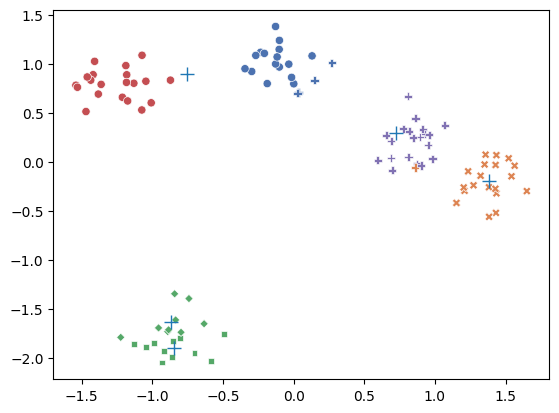

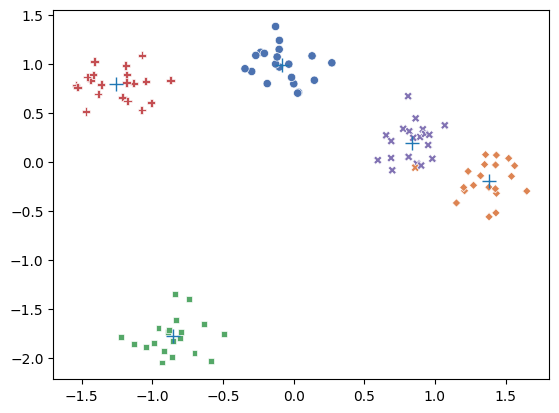

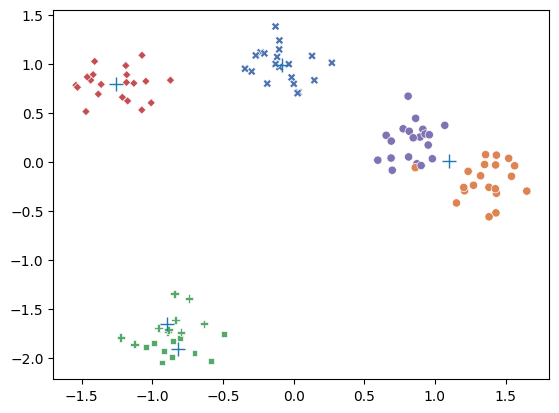

In [ ]:
# Тестируем здесь

from numpy.random import uniform
import random

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters # Количество кластеров
        self.max_iter = max_iter # Максимальное количество итераций
    def fit(self, X_train):
        """
        X_train: numpy array of shape (n,m)
        """
        # Случайно выбираем начальные точки центроида, равномерно распределенные по области набора данных

        # Найдите минимальное и максимальное значение для каждого измерения в X_train (координаты по широте и долготе) и сохраните их в min_ и max_
        # min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        # self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]

        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            dists /= np.sum(dists)
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]

        # Итеративно повторяем до сходимости или до максимального количества итераций
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:

            # Сортируем точки по ближайшему центроиду
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                #Найдите индекс ближайшего центроида см. функцию np.argmin
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Сохраните текущие центроиды в prev_centroids
            prev_centroids = np.copy(self.centroids)
            # Обновите центроиды средним значением точек в кластере
            self.centroids = [np.mean(points, axis=0) if points else prev for points, prev in zip(sorted_points, prev_centroids)]

            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Если центроид не имеет ни одной точки, то выбираем предыдущее значение
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def evaluate(self, X):
        """
        Function to evaluate the model on the dataset X.
        X: numpy array of shape (n,m)
        """
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

import warnings
warnings.filterwarnings('ignore')


for i in range(3):
    kmeans = KMeans(n_clusters=centers) # Передадим количество кластеров, которое мы задали в данных
    kmeans.fit(X_train)
    # View results
    class_centers, classification = kmeans.evaluate(X_train)
    sns.scatterplot(x=[X[0] for X in X_train],
                    y=[X[1] for X in X_train],
                    hue=true_labels,
                    style=classification,
                    palette="deep",
                    legend=None
                    )
    plt.plot([x for x, _ in kmeans.centroids],
            [y for _, y in kmeans.centroids],
            '+',
            markersize=10,
            )
    plt.show()

Сразу пишу, что глянул в гугле, тем не менее данный алгоритм называется
K-means++. Насколько я понимаю, его суть в том чтобы разместить начальные центроиды максимально в разных частях поля, подальше друг от друга, чтобы они не враждовали за одни кластеры. Это решает одну из проблем кода, которую я обозначил выше.

## Кластеризация потребителей и интерпретируемость результатов

В данном задании мы воспользуемся уже готвой реализацией [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) из библиотеки sklearn. **НЕ НУЖНО ИСПОЛЬЗОВАТЬ СВОЮ**

В этой части мы будем использовать набор данных [The Airlines Customer Satisfaction](https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction), который содержит информацию об удовлетворенности клиентов авиакомпании. Каждая запись представляет клиента, а переменные включают в себя демографические данные клиента, тип поездки (бизнес и т. д.) и оценки удовлетворенности различными аспектами полета.

Посмотрим на данные

In [ ]:
import pandas as pd

airline_data = pd.read_csv('Invistico_Airline.csv')
airline_data.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


### Препроцессинг

Давайте удалим некоторые столбцы, которые мы не хотим влиять на наши кластеры - для этого я удалю все категориальные столбцы из возможного решения:

* Satisfaction;
* Gender;
* Customer Type;
* Class;
* Type of Travel;

Когда речь идет о категориальных переменных, мы не хотим иметь слишком много фиктивных переменных, влияющих на наши кластеры.
По мере добавления в решение k-means все большего количества бинарных (также называемых фиктивными) переменных, эти переменные начинают иметь большой вес в итоговых расстояниях кластеризации, даже после стандартизации, поэтому очень важно быть осторожным при добавлении этих типов данных в любое решение k-means.

<font color="blue">**Задание** (0.25 балл)</font> Удалите с помощью функции `.drop` эти переменные из датасета

In [ ]:
airline_data_filter = airline_data.drop(columns=['satisfaction','Gender','Customer Type','Class','Type of Travel'], axis=1)
airline_data_filter.head(5)

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


Также у нас есть пропуски в "Arrival Delay in Minutes" давайте заполним их

In [ ]:
airline_data_filter['Arrival Delay in Minutes'] = np.where(
    airline_data_filter['Arrival Delay in Minutes'].isna(),
    airline_data_filter['Departure Delay in Minutes'],
    airline_data_filter['Arrival Delay in Minutes']
)

<font color="blue">**Задание** (0.5 балл)</font> В дальнейшем нам тяжело будет анализировать результаты кластеризации из-за очень большой размерности наших векторов-признаков. Более того высокая размерность часто плохо сказывается на алгоритме K-Means.

Для того чтоб избавиться от некоторых признаков можно воспользоваться уже знакомым некоторым приёмом - удалить или скомбинировать высокоскореллированные признаки.

Для этого постройте heatmap для корреляций признаков.

*Hint*: `dp.corr()` и `sns.heatmap` вам в помощь

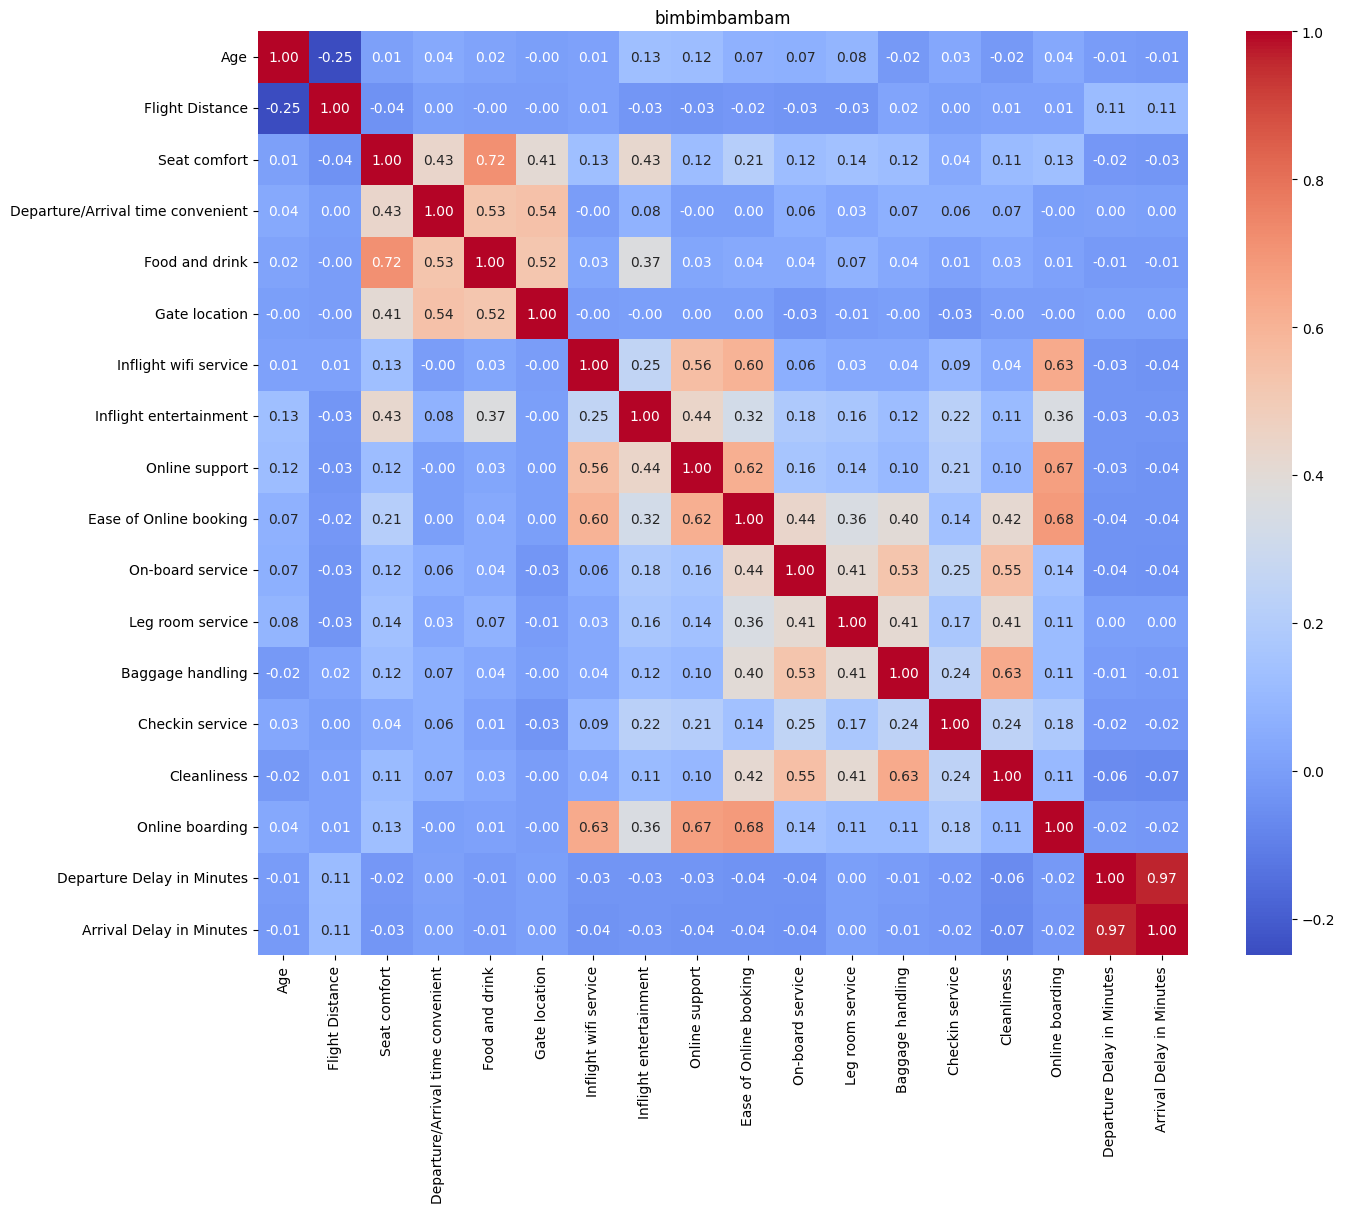

In [ ]:
# Строим тепловую карту корреляции признаков
corr_matrix = airline_data_filter.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm') # отдельные слова благодарности создателю гугла
plt.title('bimbimbambam')
plt.show()

<font color="blue">**Задание** (0.5 балл)</font> А теперь возьмите среднее из групп признаков, которые имеют между собой высокую коррелцию.

Создайте новые признаки:
* Online and Wi-Fi Satisfaction - среднее из 'Online boarding', 'Inflight wifi service', 'Online support', 'Ease of Online booking'
* Comfort & Food - среднее из 'Seat comfort', 'Food and drink'

(не забудьте удалить признаки, которые использовали в новых переменных, чтоб они не дублировались)

In [ ]:
airline_data_filter['Online and Wi-Fi Satisfaction'] = airline_data_filter[['Online boarding', 'Inflight wifi service', 'Online support', 'Ease of Online booking']].mean(axis=1)
airline_data_filter['Comfort & Food'] = airline_data_filter[['Seat comfort', 'Food and drink']].mean(axis=1)

airline_data_filter.drop(['Online boarding', 'Inflight wifi service', 'Online support', 'Ease of Online booking', 'Seat comfort', 'Food and drink'], axis=1, inplace=True)
airline_data_filter.drop(columns=['Arrival Delay in Minutes'], inplace=True)

Следующий шаг в предобработке данных - стандартизация, нам нужно добиться чтоб все переменные в нашем датасете имели среднее равное нулю, а стандартное отклонение - единице.

Этого можно добиться использовав [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) из библиотеки sklearn.

<font color="red">**Задание** (0.75 балл)</font> Объясните своми словами, почему важна стандартизация в алгоритме K-Means.

Стандартизация данных очень важна дял K-means, поскольку она гарантирует, что все переменные вносят равный вклад в вычисление расстояний, помогая избежать смещения в результаты кластеризации, которое может возникнуть из-за различий в масштабах переменных. Стандартизация также способствует более быстрой сходимости алгоритма и облегчает интерпретацию результатов.

<font color="blue">**Задание** (0.25 балл)</font> Воспользуйтесь StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_airline = scaler.fit_transform(airline_data_filter)
scaled_airline = pd.DataFrame(scaled_airline, columns=airline_data_filter.columns) # для удобства преобразовал обратно в df

Ура! Вы сделали это! Теперь мы можем применить наш алгоритм к нашим данным!

### K-means

Давайте обучим модель KMeans на наших данных и посмотрим, как она разделит наши данные на кластеры.


Но для начала нам нужно определить, какое количество кластеров мы хотим использовать. Для этого мы будем использовать elbow method. \
Этот метод заключается в том, чтобы построить график, показывающий, как $J^{class}$ изменяется в зависимости от количества кластеров и посмотреть при каком количестве класетров виден перегиб в скорости уменьшения падения графика.

<font color="blue">**Задание** (0.5 балл)</font> Переберите размеры кластеров от 2 до 12, обучите K-Means при каждом размере кластера и постройте график демонстрирующий изменение метрики.

*Hint*: Внимательно прочитавший документацию к K-Means в sklearn уже знает, что эта метрика хранится в переменнной `inertia_` после обучения.

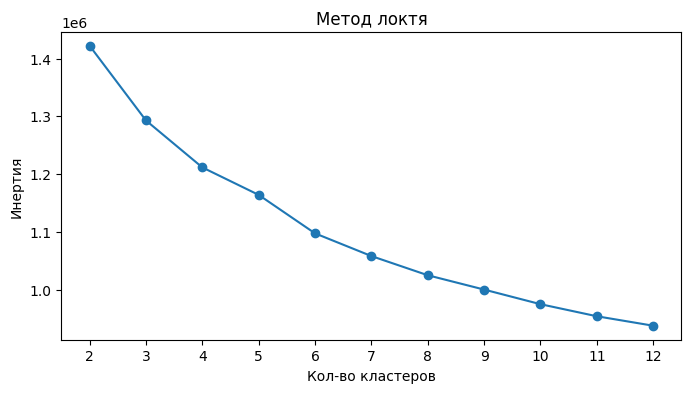

In [ ]:
from sklearn.cluster import KMeans

inertias = []
inertias = [KMeans(n_clusters=k, random_state=69).fit(scaled_airline).inertia_ for k in range(2, 13)]

plt.figure(figsize=(8, 4))
plt.plot(range(2, 13), inertias, marker='o')
plt.title('Метод локтя')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Инертия')
plt.xticks(range(2, 13))
plt.show() # а здесь нужно немного подождать

<font color="red">**Задание** (0.75 балл)</font> Объясните своими словами для чего нам необходимо использовать elbow method и какое количество вы выбрали (и почему). Почему мы не можем просто выбрать какое-то маленькое или какое-то большое количество кластеров?

Метод "локтя" используется в алгоритме K-Means для определения оптимального количества кластеров. Основная идея метода заключается в анализе того как изменяется внутрикластерная сумма квадратов расстояний при увкличении числа кластеров. Эта метрика измеряет суммарное расстояние между точками и их соответствующими центроидами кластеров.


---


Проанализировав график я выбрал 4 кластера, потому что именно при 4 кластерах наблюдалось заметное замедление уменьшения внутрекластерной суммы квадратов расстояний, а значит 4 кластера достаточно для эффективного разделения данных.


---


Выбор слишком маленького кол-ва кластеров может привести к тому, что в один кластер будут объединены совершенно разные по своим свойствам точки, что снижает качество кластеризации. С другой стороны, выбор очень большого количества кластеров может привести к излишнему дроблению данных, когда даже очень схожие точки будут расположены в разных кластерах, что также будет приводить к искажению результатов.

<font color="blue">**Задание** (0.25 балл)</font> Теперь когда мы определилиcь с количеством класетров давайте обучим нашу модель и получим предсказание.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=69)
kmeans.fit(scaled_airline)
airline_data_filter['cluster_kmeans'] = kmeans.predict(scaled_airline)

### Анализируем результаты кластеризации

Тепреь когда мы кластеризовали наши данные пора посмотреть на какие кластеры он их распределил. Эта информация поможет нам понять основные группы наших клиентов и волнуюзие их проблемы.

Для этого сравним среднее значение признака по каждому кластеру с средним значением среди всех наших клиентов.

In [ ]:
airline_data_filter.groupby(['cluster_kmeans']).mean()

,Age,Flight Distance,Departure/Arrival time convenient,Gate location,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Online and Wi-Fi Satisfaction,Comfort & Food
cluster_kmeans,,,,,,,,,,,,,
0,42.288568,1937.730854,1.551464,1.624525,3.982595,4.195530,4.120174,4.297429,3.813884,4.305578,12.624604,3.988034,1.872587
1,42.367326,1840.134474,2.924464,3.020517,3.497085,2.258626,2.459906,2.387556,2.780688,2.390806,13.870082,3.269808,2.954666
2,40.879015,1946.950590,4.059642,3.783023,4.055158,4.139954,4.033500,4.300922,3.768583,4.315614,12.384591,3.800583,3.938381
3,31.766236,2218.213507,2.720304,2.960563,1.770812,3.130291,3.228616,3.679655,2.903930,3.691870,20.790632,2.443957,1.957467


In [ ]:
airline_data_filter.mean()

Age                                    39.427957
Flight Distance                      1981.409055
Departure/Arrival time convenient       2.990645
Gate location                           2.990422
Inflight entertainment                  3.383477
On-board service                        3.465075
Leg room service                        3.485902
Baggage handling                        3.695673
Checkin service                         3.340807
Cleanliness                             3.705759
Departure Delay in Minutes             14.713713
Online and Wi-Fi Satisfaction           3.398381
Comfort & Food                          2.845296
cluster_kmeans                          1.597852
dtype: float64

*Курсив*<font color="green">**Задание** (1 балл)</font> Опишите подробно ключевые особенности каждого из наших кластеров

Проанализировав кластеры и сравнив их средние значения с общими средними значениями можно сделать несколько умозаключений:

> Кластер 0- Средний возраст, длина полета, задержка вылета близки к общим средним значениям.
Значительно ниже среднего оценки по удобству времени вылета/прилета.
Выше среднего оценки по развлечениям в полете, обслуживанию на борту, месту для ног, обработке багажа, чистоте, удовлетворенности онлайн-сервисами и Wi-Fi.
Комфорт и питание на борту оцениваются ниже среднего.

> Кластер 1- Средний возраст и длина полета близки к общему среднему.
Выше среднего оценки по удобству времени вылета/прилета, но ниже среднего по всем остальным аспектам, особенно по обслуживанию на борту, месту для ног, обработке багажа.
Оценка комфорта и питания на борту значительно выше среднего.

> Кластер 2- Средний возраст и длина полета близки к общему среднему.
Оценки почти всех аспектов (кроме задержки вылета) выше среднего, особенно удовлетворенность онлайн-сервисами и Wi-Fi, а также комфорт и питание на борту.

> Кластер 3- Самый молодой средний возраст и самая длинная дистанция полетов.
Низкие оценки почти по всем аспектам, особенно по развлечениям в полете, чистоте, удовлетворенности онлайн-сервисами и Wi-Fi.
Высокая средняя задержка вылета по сравнению с другими кластерами.

<font color="green">**Задание** (1 балл)</font> Предложите идеи, как повысить оценки для каждой из групп пользователей.

Хорошей идеей могут быть персонифицированные предложения: помните, что мы хотим сэкономить деньги компании, поэтому не раздавайте скидки тем, кому они не нужны.

Идеи для повышения оценки:

> Кластер 0- Оптимизировать вермя вылетов, обновить посадочные места(ну чтоб как-то покомфортнее было), обновить меню для питания.

> Кластер 1- Предлагать людям возможность заранее выбирать меню на борту или забронировать места с дополнительным пространством для ног за мааааленькую доплату.

> Кластер 2- Сделать бесплатный или улучшенный Wi-Fi на борту, а также усовершенствовать мобилбное приложение для более удобного бронирования и управления рейсами.

> Кластер 3- Создайть специальные предложения или скидки для молодежи или студентов, учитывая их потребность в более экономичных вариантах путешествий.









## Кластеризация географических данных

В этом задании мы рассмотрим, насколько мощным инструментом может быть кластеризация в случае решение геопространственных задач.

Попробуем решить задачу известную, как Retail Rationalization problem. В чем она заключается?

Retail Rationalization - это реорганизация компании с целью повышения ее операционной эффективности и снижения затрат. В результате кризиса Covid-19 многие розничные компаний по всему миру закрывают магазины. Это не только симптом финансового кризиса, на самом деле многие компании направляют свои инвестиции на то, чтобы сделать свой бизнес более цифровым.

Более простыми словами нас интересует закрыть как можно больше точек, но в то же время не потеряв в покрытии территории, а то наши конкуренты откроются там и мы потеряем наших клиентов.

Давайте для начала посмотрим на данные и позже сформулируем, как мы будем решать эту задачу.

In [ ]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
import scipy

In [ ]:
dtf = pd.read_csv("starbucks_london.csv")
dtf.head()

,id,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost
0,0,London,265 Wharncliffe Rd North,-81.254001,43.003348,6,1,5,high
1,1,London,"1105 Wellington Rd., Store No. 122",-81.172402,42.937231,7,2,5,medium
2,2,London,631 Commissioners Road East,-81.213745,42.982692,7,4,3,medium
3,3,London,1442 Fanshawe Park Road,-81.310425,43.021347,9,8,1,high
4,4,London,"580 Fanshawe Park Road East, Unit 1, White Oak...",-81.212026,43.054112,4,1,3,medium


Как можно заметить у нас есть датасет со всеми Старбаксами Лондона.

Каждая запись содержит:
* Street Adress (адресс улицы)
* Longtitude (долгота)
* Latitude (широта)
* Potential - количество рабочих мест в заведении
* Staff - нынешнее количество персонала
* Capacity - количество свободных мест
* Cost - стоимость обслуживания заведения (арендная плата, налоги по вывозу мусора, коммунальные платы) *High, Medium, Low*

<font color="green">**Бонус**</font> Сразу оговорюсь у нас широта и долгота в данных не точные, но адресс точный. Если вы сможете улучшить датасет и добавить более точные координаты накину дополнительный балл в творческую оценку.


Посмотрим на распредление Cost

<font color="blue">**Задание** (0.25 балл)</font> Нарисуйте распредление Cost в нашем датасете. Подпишите проценты на графике.

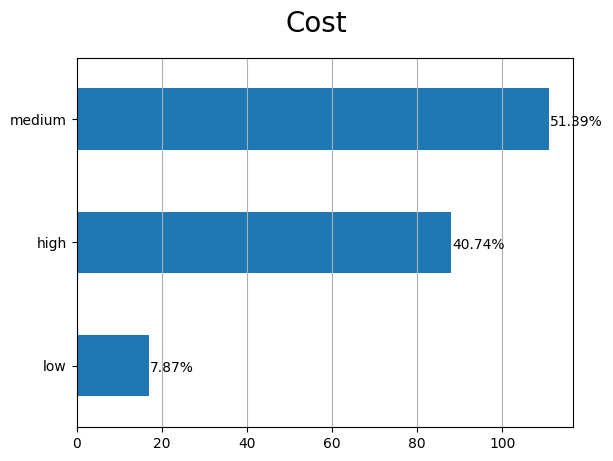

In [ ]:
x = "Cost"
ax = dtf[x].value_counts().sort_values().plot(kind="barh")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20,
     str(round((i.get_width()/total)*100, 2))+'%',
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show() # спасибо, Даня

Как мы видим у нас достаточно большое количество мест с высокой стоимостью обслуживания, их мы и хотим закрыть.

А теперь построим карту наших заведений. Я это делаю с помощью библиотеки [Folium](https://python-visualization.github.io/folium/latest/).

Размер кружочка означает количество рабочих мест.

In [ ]:
city = "London"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]

x, y = "Latitude", "Longitude"
color = "Cost"
size = "Staff"
popup = "Street Address"
data = dtf.copy()

## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(dtf[color].unique()))
data["color"] = data[color].apply(lambda x:
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], popup=row[popup],
           color=row["color"], fill=True,
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))

## plot the map
map_ # и ещё раз спасибо

London, Greater London, England, United Kingdom


### Приступаем к решению задачи

Наша цель - закрыть как можно больше дорогостоящих магазинов (красные точки), переведя их персонал в недорогие магазины (зеленые точки), расположенные в том же районе. В результате мы получим максимальную прибыль (за счет закрытия высокозатратных магазинов) и эффективность (за счет того, что низкозатратные магазины будут работать на полную мощность).

Как определить районы без выбора пороговых значений расстояния и географических границ? Ответ - кластеризация.

<font color="blue">**Задание** (0.5 балл)</font> Обучите K-means на данных широты и долготы и выберите наилучшее количество кластеров. Так как сейчас мы работаем с думерными данными, нам не нужно пользоваться elbow method и мы можем визуально оценить наше разбиение.

In [ ]:
k = 5 # вроде нормас заходит
model = KMeans(n_clusters=k, random_state=42)
X = dtf[["Latitude","Longitude"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_,
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
dtf[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
dtf.sample(5)

,id,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost,cluster,centroids
213,213,London,10 Russell Street,-0.082482,51.559837,4,1,3,medium,0,0
156,156,London,62 Wandsworth Road,-0.094345,51.500101,4,3,1,medium,0,0
116,116,London,"Waterloo East Station, Platform B/C, Sandell S...",-0.077781,51.548757,4,2,2,high,0,0
76,76,London,"305-307 Green Lanes, London, Heathrow Express ...",-0.103370,51.624467,4,2,2,medium,0,0
73,73,London,76 - 78 Holland Park Avenue,-0.195058,51.526704,7,2,5,low,4,0


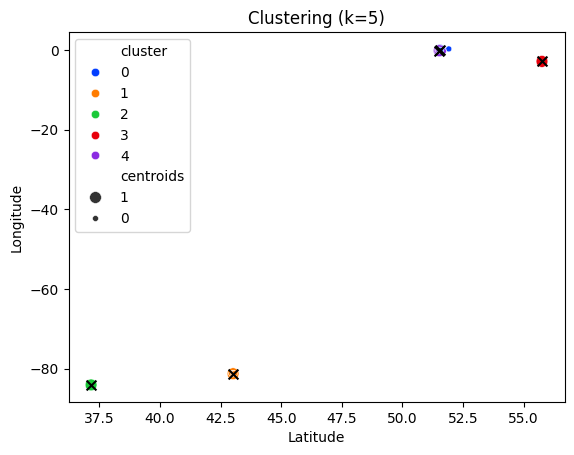

In [ ]:
# plot
fig, ax = plt.subplots()
sns.scatterplot(x="Latitude", y="Longitude", data=dtf,
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black',
           marker="x")

Теперь когда мы разбили на кластеры можно начать закрывать магазины.

Внутри каждого кластера я выберу потенциальные цели (магазины с высокой стоимостью товаров) и хабы (магазины с низкой стоимостью товаров) и переведу персонал целей в хабы, пока последние не достигнут полной загрузки. Когда весь персонал целевого магазина будет перемещен, магазин можно будет закрыть.

<iframe src="https://giphy.com/embed/ToVBAqpfMLk9mrV5YR" width="480" height="296" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/ToVBAqpfMLk9mrV5YR">via GIPHY</a></p>

In [ ]:
dtf_new = pd.DataFrame()
for c in sorted(dtf["cluster"].unique()):
    dtf_cluster = dtf[dtf["cluster"]==c]

    ## hubs and targets
    lst_hubs = dtf_cluster[dtf_cluster["Cost"]=="low"
               ].sort_values("Capacity").to_dict("records")
    lst_targets = dtf_cluster[dtf_cluster["Cost"]=="high"
               ].sort_values("Staff").to_dict("records")
    ## move targets
    for target in lst_targets:
         for hub in lst_hubs:
             ### if hub has space
             if hub["Capacity"] > 0:
                residuals = hub["Capacity"] - target["Staff"]
                #### case of hub has still capacity: do next target
                if residuals >= 0:
                   hub["Staff"] += target["Staff"]
                   hub["Capacity"] = hub["Potential"] - hub["Staff"]
                   target["Capacity"] = target["Potential"]
                   target["Staff"] = 0
                   break
                #### case of hub is full: do next hub
                else:
                   hub["Capacity"] = 0
                   hub["Staff"] = hub["Potential"]
                   target["Staff"] = -residuals
                   target["Capacity"] = target["Potential"] - target["Staff"]
    dtf_new = dtf_new.append(pd.DataFrame(lst_hubs)
                 ).append(pd.DataFrame(lst_targets))
dtf_new = dtf_new.append(dtf[dtf["Cost"]=="medium"]
                 ).reset_index(drop=True).sort_values(
                 ["cluster","Staff"])
dtf_new.head()

,id,City,Street Address,Longitude,Latitude,Potential,Staff,Capacity,Cost,cluster,centroids
8,195,London,"Tooley Street, Unit 6, Hays Galleria",-0.031544,51.533429,6,0,6,high,0,0
9,189,London,55 Borough High Street,-0.062375,51.513022,3,0,3,high,0,0
10,41,London,"80 Dog Kennel Hill, East Dulwich",-0.046930,51.504516,5,0,5,high,0,0
11,159,London,"Unit D, 1C Greenwich Shopping Park, Bugsbys Wa...",0.017686,51.520539,9,0,9,high,0,0
12,116,London,"Waterloo East Station, Platform B/C, Sandell S...",-0.077781,51.548757,4,0,4,high,0,0


<font color="blue">**Задание** (0.25 балл)</font> Посчитайте сколько в итоге закрылось магазинов (`staff == 0`)

In [ ]:
print(dtf_new[dtf_new['Staff'] == 0].shape[0])

24


<font color="green">**Задание** (3 балл)</font> Нарисуйте на карте самостоятельно результаты нашей рационализации. Графически обозначьте закрытые магазины, придумайте как показать из каких магазинов в какие должны перейти сотрудники.

Полезные ресурсы для вдохновления:
* [Основы работы с folium](https://medium.com/@enduranceprog/creating-a-python-web-map-5d5a5c081078)
* [Подробно про работу с геоданными в Python и Jupyter](https://proglib.io/p/rabota-s-geodannymi-v-python-i-jupyter-2021-03-22)
* [ Десять простых примеров использования folium](https://snyk.io/advisor/python/folium/example)

In [ ]:
from folium.plugins import AntPath

# крата
lat_mean = dtf_new['Latitude'].mean()
long_mean = dtf_new['Longitude'].mean()
m = folium.Map(location=[lat_mean, long_mean])
# маркеры для закрытых магазинов
for index, row in dtf_new[dtf_new['Staff'] == 0].iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=5,
                        color='red',
                        fill=True,
                        fill_color='red',
                        popup=row['Street Address']).add_to(m)
# маркеры для открытых магазинов
for index, row in dtf_new[dtf_new['Staff'] > 0].iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=5,
                        color='green',
                        fill=True,
                        fill_color='green',
                        popup=row['Street Address']).add_to(m)
# стрелки перехода персонала
for target in lst_targets:
    target_location = [target['Latitude'], target['Longitude']]
    for hub in lst_hubs:
        if target['Staff'] == 0:
            hub_location = [hub['Latitude'], hub['Longitude']]
            # используем AntPath для создания стрелок
            ant_path = AntPath(locations=[hub_location, target_location], delay=0, color='#7590ba')
            ant_path.add_to(m)

m

<font color="red">**Бонус**</font> Любыми способами улучшите нынешнее решение задачи. Гугл в помощь. Решение, которое мне понравится больше всего получит автомат на экзамене. *Упс, спойлеры*


![](https://sun9-47.userapi.com/impg/q8wMhmvip0nM62VpPFfbWvxODaX8kqq-KkauGw/DFTznqT_by4.jpg?size=580x300&quality=96&sign=ec76803230dffb5d1a94aaeb29ca1c5c&c_uniq_tag=tSJq2KM80IT7kZdVUdE2mmfghB47Kp-sPDXpYwSYcKY&type=album)